In [2]:
import pandas as pd
from collections import Counter
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import numpy as np
from numpy import vstack,array
from numpy.random import rand
from itertools import combinations
import networkx as nx
import os
from mpl_toolkits.basemap import Basemap as Basemap
from networkx.algorithms.community import k_clique_communities
import demon as d
import community as community_louvain
import matplotlib.cm as cm

## Building the graph

In [5]:
clusters = pd.read_csv('../dataset/clusters.csv')
clusters.index.name = 'cluster_id'
entries = pd.read_csv('../dataset/cluster_conenctions.csv')

N = 2 # Connetion identification threshold
G = get_graph(N)

## Plot the graph

# Community Discovery
### K_Clique (3 cliques)

In [77]:
min_clique = 3
cliques = list(nx.find_cliques(G))
communities = list(k_clique_communities(G, min_clique, cliques))

In [78]:
colors = plt.get_cmap("tab10")(list(range(0, len(communities) + 1)))
color_map = []
    
for node in G:
    for idx, community in enumerate(communities):
        if node in community:
            color_map.append(colors[idx])
            break
        if idx == (len(communities) - 1):
            color_map.append(colors[idx + 1])
            break

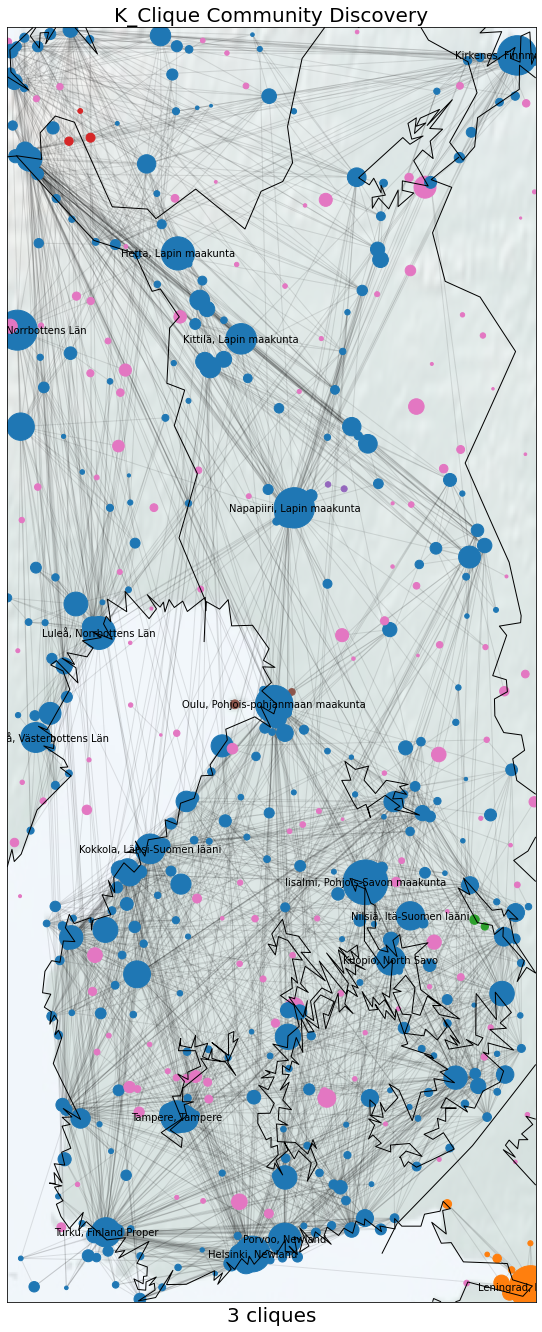

In [79]:
plot_map(G, N, edge_alpha=0.1, node_color=color_map, title='K_Clique Community Discovery', subtitle='3 cliques', should_save=True)

### K_Clique (6 cliques)

In [80]:
min_clique = 6
cliques = list(nx.find_cliques(G))
communities = list(k_clique_communities(G, min_clique, cliques))

In [81]:
colors = plt.get_cmap("tab10")(list(range(0, len(communities) + 1)))
color_map = []
    
for node in G:
    for idx, community in enumerate(communities):
        if node in community:
            color_map.append(colors[idx])
            break
        if idx == (len(communities) - 1):
            color_map.append(colors[idx + 1])
            break

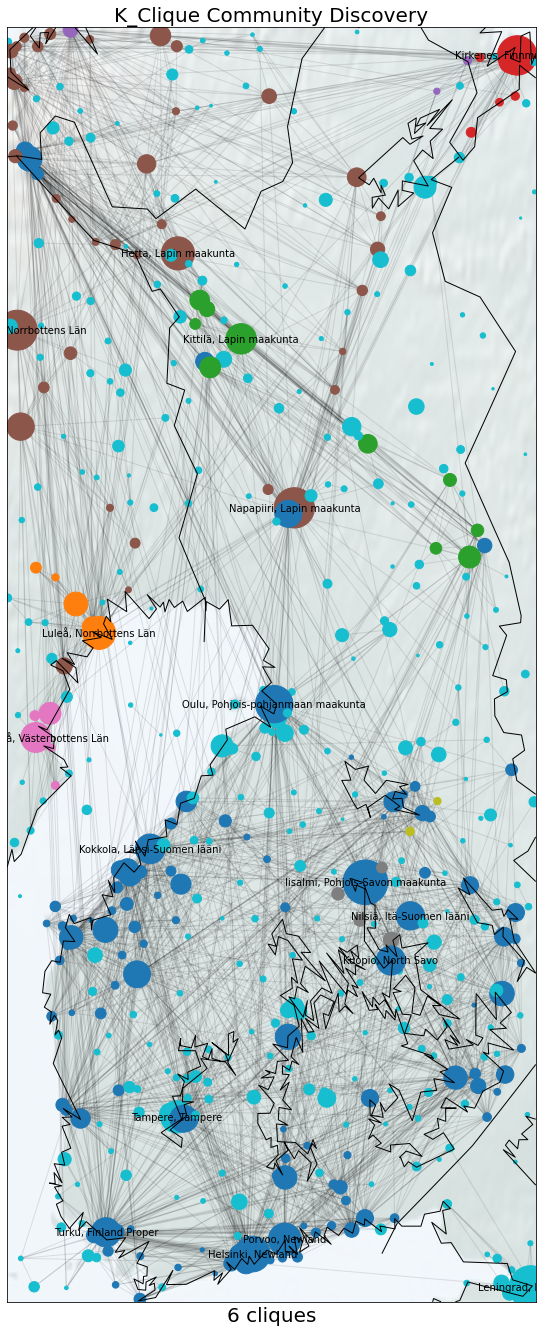

In [82]:
plot_map(G, N, edge_alpha=0.1, node_color=color_map, title='K_Clique Community Discovery', subtitle='6 cliques', should_save=True)

### DEMON method (min. community size = 3)

In [83]:
dm = d.Demon(graph=G, epsilon=0.25, min_community_size=3)
communities = dm.execute()

Exec: 100%|████████████████████████

Time:  'execute' 0.67 sec
------------------------------------


In [84]:
colors = plt.get_cmap("tab10")(list(range(0, len(communities) + 1)))
color_map = []
    
for node in G:
    for idx, community in enumerate(communities):
        if node in community:
            color_map.append(colors[idx])
            break
        if idx == (len(communities) - 1):
            color_map.append(colors[idx + 1])
            break

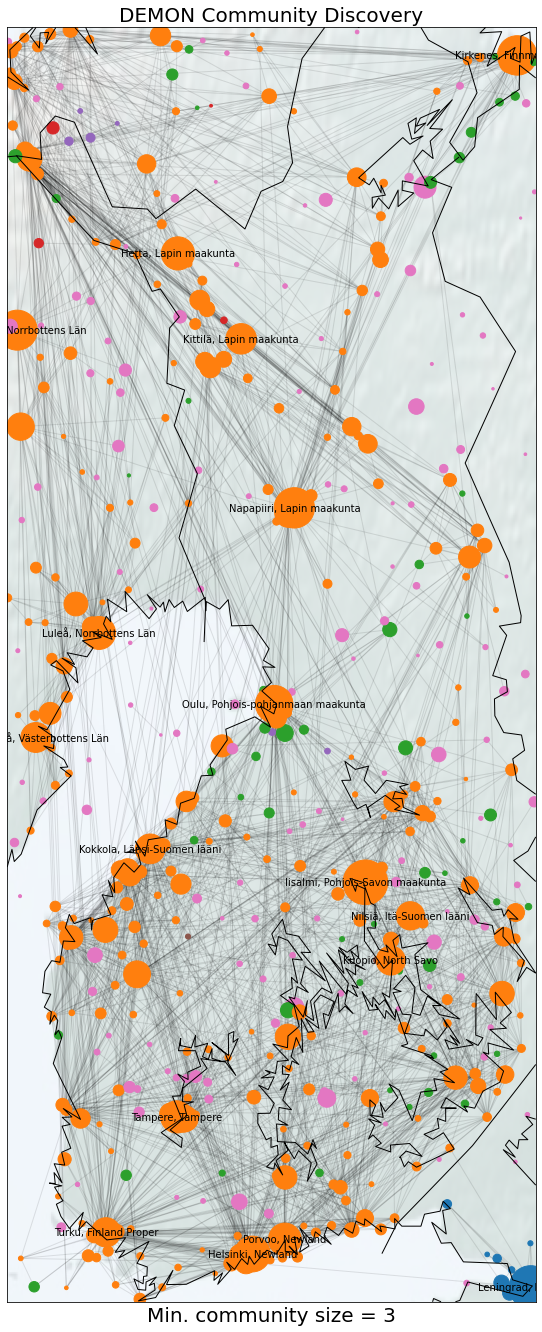

In [85]:
plot_map(G, N, edge_alpha=0.1, node_color=color_map, title='DEMON Community Discovery', subtitle='Min. community size = 3', should_save=True)

 ### Louvain method

In [86]:
# compute the best partition
partition = community_louvain.best_partition(G)

In [87]:
len(partition.values())

500

In [88]:
color_map = plt.get_cmap("tab10")(list(partition.values()))

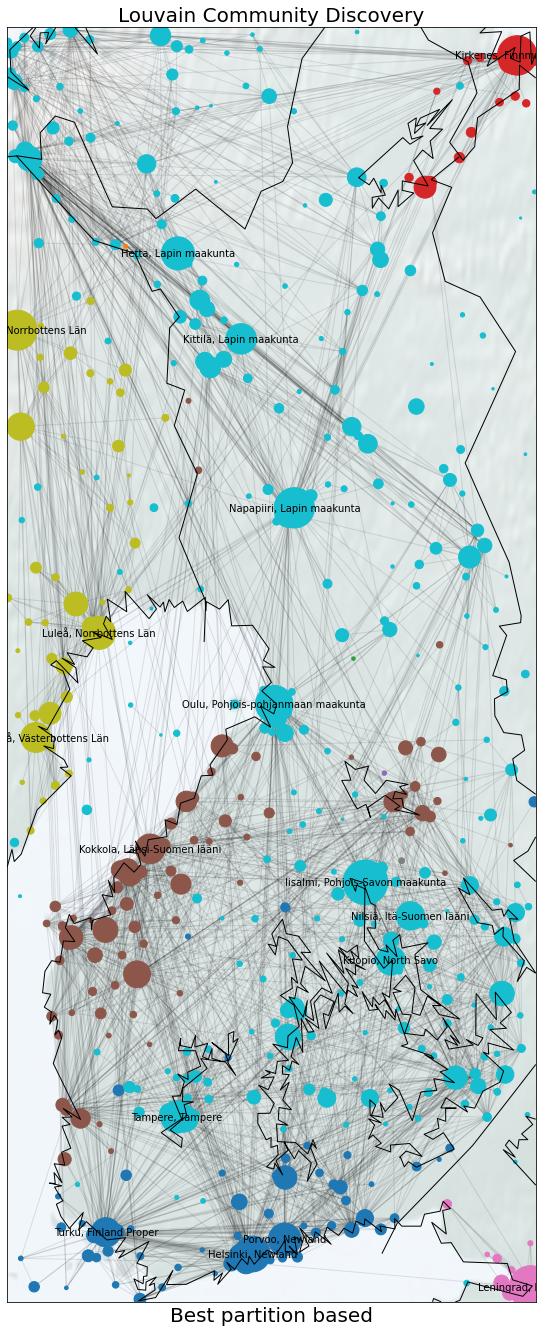

In [89]:
plot_map(G, N, edge_alpha=0.1, node_color=color_map, title='Louvain Community Discovery', subtitle='Best partition based', should_save=True)

## Communities formed

### Community 1:

In [37]:
for i in c[0]:
    print(labels_all[i])

Helsinki, Newland
Muhos, North Ostrobothnia
Kuopio, North Savo
Andra sjön, Pohjanmaan maakunta
Turku, Finland Proper
Boden, Norrbottens Län
Sirkka, Lapin maakunta
Kilpisjärvi, Lapin maakunta
Apukka, Lapin maakunta
Kirkenes, Finnmark Fylke
Penttilä, Pohjois-karjala maakunta
Tampere, Tampere
Jukkasjärvi, Norrbottens Län
Lövånger, Västerbottens Län
Ivalo, Lapin maakunta
Posio, Lapland
Loviisa, Newland
Hetta, Lapin maakunta
Unknown, Finnmark Fylke
Iisalmi, Pohjois-Savon maakunta
Ruka, Pohjois-pohjanmaan maakunta
Vaasa, Pohjanmaan maakunta
Lohtaja, Länsi-Suomen lääni
Porvoo, Newland
Savonlinna, Etelä-Savon maakunta
Yyteri, Satakunnan maakunta
Karasjok, Finnmark Fylke
Pyhätunturi, Lapin maakunta
Pyhäjoki, Oulun lääni
Oulu, Pohjois-pohjanmaan maakunta
Kvænangsfjellet, Troms Fylke
Unknown, Norrbottens Län
Kiimavaara, Oulun lääni
Seinäjoki, Etelä-Pohjanmaan maakunta
Kuluntalahti, Kainuun maakunta
Lahti, Paijat-Hame
Nilsiä, Itä-Suomen lääni
Lilleböle, Ålands skärgård
Byske, Västerbottens Län
Hie

### Community 2:

In [38]:
for i in c[1]:
    print(labels_all[i])

Krestovskiy ostrov, Petrograd
Vyborg, Leningrad Oblast
Sestroretsk, Petrograd
Zelenogorsk, Petrograd
Leningrad, Petrograd
Unknown, Petrograd
Kronshtadt, Petrograd
Kasimovo, Leningrad Oblast
Serovo, Leningrad Oblast
Petergof, Petrograd


### Community 3:

In [39]:
for i in c[2]:
    print(labels_all[i])

Nurmes, Pohjois-karjala maakunta
Juuka, North Karelia
Nunnanlahti, Itä-Suomen lääni


### Community 4:

In [40]:
for i in c[3]:
    print(labels_all[i])

Unknown, Troms Fylke
Unknown, Unknown
Unknown, Lapin lääni
Soattefielbma, Finnmark


### Community 5:

In [41]:
for i in c[4]:
    print(labels_all[i])

nan, Lapin maakunta
nan, Lapin maakunta
Rovaniemi, Lapin maakunta


### Community 6:

In [42]:
for i in c[5]:
    print(labels_all[i])

Oulu, North Ostrobothnia
Hailuoto, North Ostrobothnia
Oulu, Pohjois-pohjanmaan maakunta


In [4]:
def get_graph(n_conn):
    clusters = pd.read_csv('../dataset/clusters.csv')
    clusters.index.name = 'cluster_id'
    entries = pd.read_csv('../dataset/cluster_conenctions.csv')
    G = nx.Graph()
    for c in clusters.iterrows():
        G.add_node(c[0], pos=(c[1]['lon'], c[1]['lat']), label=c[1]['label'], size=c[1]['size'])
    for row in entries.iterrows():
        if row[1]['entries'] > n_conn: # gathering is considered to be more than 2 people
            G.add_edge(row[1]['cluster_id0'],
                   row[1]['cluster_id1'],
                   weight=row[1]['entries'])
    return G


def plot_map(G,
             n_conn,
             edge_color='#000000',
             edge_alpha=0.2,
             node_color='#1F78B4',
             title='Plotting spatial data',
             subtitle='',
             should_save=False):
    min_lat = 59.800
    max_lat = 69.910
    min_lon = 20.410
    max_lon = 30.410

    fig, ax = plt.subplots(figsize = (9, 18))
    
    m = Basemap(
         projection='merc',
         llcrnrlon=min_lon,
         llcrnrlat=min_lat,
         urcrnrlon=max_lon,
         urcrnrlat=max_lat,
         lat_ts=0,
         resolution='l',
         suppress_ticks=True)

    pos_data = nx.get_node_attributes(G, 'pos')
    lons = clusters['lon'].values
    lats = clusters['lat'].values
    pos = {}
   
    # convert lat and lon to map projection
    mx, my = m(lons, lats)
    for count, value in enumerate(pos_data.items()):
        pos[count] = (mx[count], my[count])
       
    labels_all = nx.get_node_attributes(G, 'label')
    labels = {}
    for x in G.nodes():
        if nx.get_node_attributes(G, 'size')[x] >= 800:
            labels[x] = labels_all[x]
        
    node_sizes=list(nx.get_node_attributes(G, 'size').values())
    nx.draw_networkx_nodes(G, pos = pos, node_size=node_sizes, node_color=node_color)
    nx.draw_networkx_edges(G, pos = pos, alpha=edge_alpha, edge_color=edge_color)
    nx.draw_networkx_labels(G, pos, labels = labels, font_size=10)

    m.drawcountries(linewidth = 1)
    m.shadedrelief(alpha=0.3)
    m.drawcoastlines(linewidth=1)
    plt.tight_layout()
    plt.title(title, fontsize=20)
    ax.set_xlabel(subtitle, fontsize=20)
    if should_save:
        fig.savefig('./output/' + title.replace(' ', '_') + '_' + subtitle.replace(' ', '_') + '.png')
    plt.show()